#Space Shuttle O-Ring Failures - Logistic Regression Example

## Setup

In [2]:
##Clear the environment
rm(list=ls())

##Turn off scientific notations for numbers
options(scipen = 999)  

##Set locale
Sys.setlocale("LC_ALL", "English") 

##Set seed for reproducibility
set.seed(2345)

getstats <- function(cm){
  # Sensititvity a.k.a TPR
  tpr <-cm[2,2]/(cm[2,2]+cm[2,1])
  fpr <-cm[1,2]/(cm[1,2]+cm[1,1])
  
  # Specificity a.k.a. TNR
  tnr <- cm[1,1]/(cm[1,1]+cm[1,2])
  fnr <- cm[2,1]/(cm[2,1]+cm[2,2])
  
  # Calculate accuracy
  acc <-(cm[2,2]+cm[1,1])/sum(cm)
  err <-(cm[1,2]+cm[2,1])/sum(cm)
  
  #Precision - Positive Predictive Value
  ppv <- cm[2,2]/(cm[2,2]+cm[1,2])
  
  # Negative Predictive Value
  npv <- cm[1,1]/(cm[1,1]+cm[2,1])
  
  rbind(TruePos_Sensitivity=tpr, FalsePos=fpr, TrueNeg_Specificty=tnr, FalseNeg=fnr, PositivePredictiveValue=ppv, NegativePredictiveValue=npv, Accuracy = acc, Error = err)
}

thres=.5 # Start at 50%
nbrclust = 2

[1] "LC_COLLATE=English_United States.1252;LC_CTYPE=English_United States.1252;LC_MONETARY=English_United States.1252;LC_NUMERIC=C;LC_TIME=English_United States.1252"

##Data

On January 27, 1986, the night before the space shuttle Challenger exploded, engineers at the company that built the shuttle warned National Aeronautics and Space Administration (NASA) scientists that the shuttle should not be launched because of predicted cold weather. Fuel seal problems, which had been encountered in earlier flights, were suspected of being associated with low temperatures. It was argued, that the evidence was inconclusive. The decision was made to launch, even though the temperature at launch time was 29 F.

The data consists of temperatures (degrees Fahrenheit) and an indicator of O-ring failures for 24 space shuttle launches prior to the Challenger disaster. The data in this example comes from Kelly, D. L., & Smith, C. L., (2008). “Risk Analysis of the Space Shuttle: Pre-Challenger Bayesian Prediction of Failure,” NASA Space Systems Engineering & Risk Management Symposium https://inldigitallibrary.inl.gov/sti/3901032.pdf

In [3]:
##Build dataframe
flt<-c('1','2','3','4','5','6','7','8','9','41-B','41-C','41-D','41-G','51-A','51-C','51-D','51-B','51-G','51-F','51-I','51-J','61-A','61-B','61-C')
temp<-c(66,70,69,80,68,67,72,73,70,57,63,70,78,67,53,67,75,70,81,76,79,75,76,58)
damage<-c(0,1,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,1,0,1)
df<-data.frame(flt,temp,damage)
rm(temp)
rm(damage)
rm(flt)
str(df)

'data.frame':	24 obs. of  3 variables:
 $ flt   : Factor w/ 24 levels "1","2","3","4",..: 1 2 3 4 9 18 22 23 24 5 ...
 $ temp  : num  66 70 69 80 68 67 72 73 70 57 ...
 $ damage: num  0 1 0 0 0 0 0 0 0 1 ...


In [4]:
summary(df)
sapply(df, mean)
sapply(df,sd)

## two-way contingency table of categorical outcome and predictors
xtabs(~damage + temp, data = df)

## Correlation Matrix for numeric variables
cor(df[,c(2:3)])

      flt          temp           damage      
 1      : 1   Min.   :53.00   Min.   :0.0000  
 2      : 1   1st Qu.:67.00   1st Qu.:0.0000  
 3      : 1   Median :70.00   Median :0.0000  
 4      : 1   Mean   :70.00   Mean   :0.2917  
 41-B   : 1   3rd Qu.:75.25   3rd Qu.:1.0000  
 41-C   : 1   Max.   :81.00   Max.   :1.0000  
 (Other):18                                   

Warning message:
In mean.default(X[[i]], ...): argument is not numeric or logical: returning NA

flt       temp     damage 
        NA 70.0000000  0.2916667

flt      temp    damage 
7.0710678 7.2231512 0.4643056

      temp
damage 53 57 58 63 66 67 68 69 70 72 73 75 76 78 79 80 81
     0  0  0  0  0  1  3  1  1  2  1  1  1  2  1  1  1  1
     1  1  1  1  1  0  0  0  0  2  0  0  1  0  0  0  0  0

,temp,damage
temp,1.0000000,-0.5704193
damage,-0.5704193,1.0000000


###View the Data

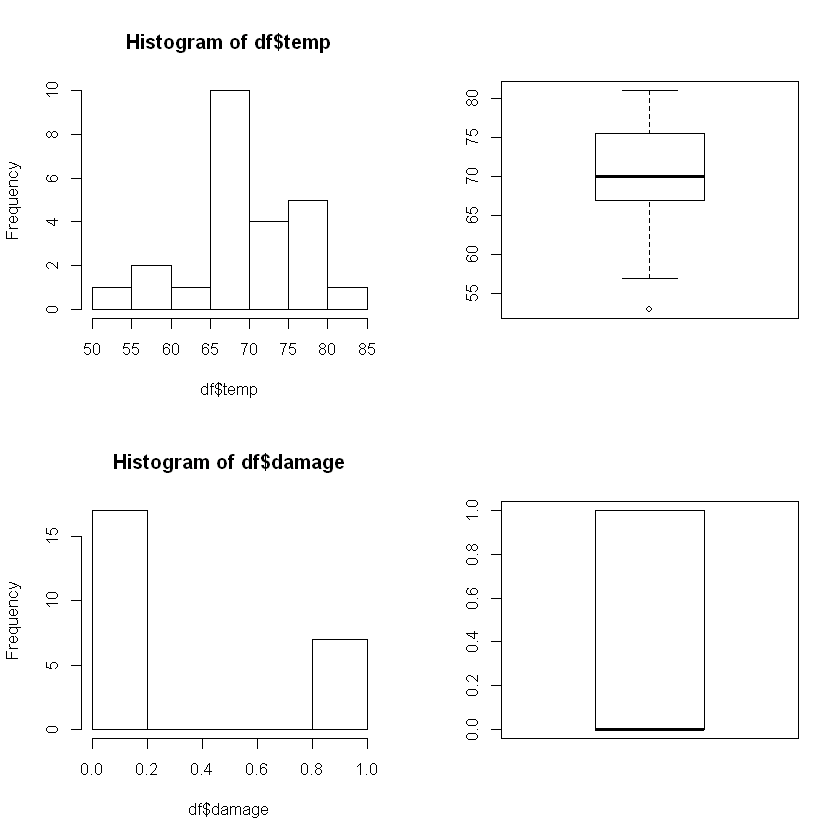

In [5]:
par(mfrow=c(2,2))
hist(df$temp)
boxplot(df$temp)
hist(df$damage)
boxplot(df$damage)

Warning message:
In par(fig = c(0, 0.8, 0, 0.8), new = TRUE): calling par(new=TRUE) with no plot

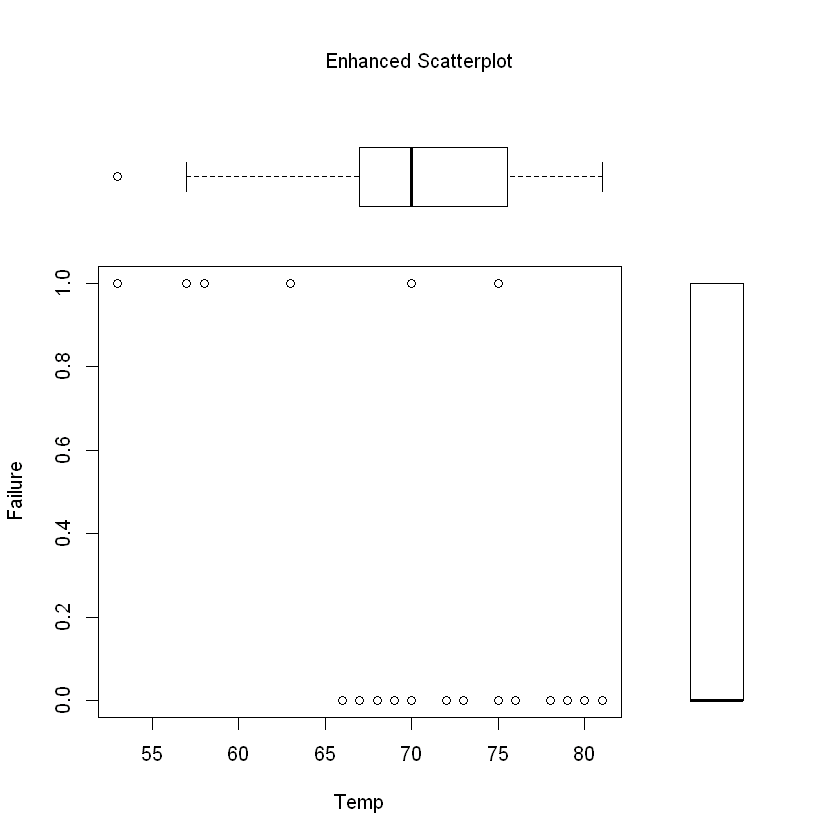

In [6]:
#Enhanced Scatter plot
# Add boxplots to a scatterplot
par(fig=c(0,0.8,0,0.8), new=TRUE)
plot(df$temp, df$damage, xlab="Temp",  ylab="Failure")
#X Variable
par(fig=c(0,0.8,0.55,1), new=TRUE)
boxplot(df$temp, horizontal=TRUE, axes=FALSE)
# Y Variable
par(fig=c(0.65,1,0,0.8),new=TRUE)
boxplot(df$damage, axes=FALSE)
mtext("Enhanced Scatterplot", side=3, outer=TRUE, line=-3)

##Establish Baseline

In [41]:
# Baseline on Training data 
# Determine the Majority
bl <-table(df$damage)
majority<-ifelse(bl[1]>bl[2],0,1)

# Fill in a prediction for the majority
predictTrainBase <-rep(majority,nrow(df))
#Compare
cm <- table(df$damage,predictTrainBase, exclude=NULL)
addmargins(cm)
getstats(cm)







,0,NA,Sum
0,17,0,17
1,7,0,7
NA,0,0,0
Sum,24,0,24


TruePos_Sensitivity,0
FalsePos,0
TrueNeg_Specificty,1
FalseNeg,1
PositivePredictiveValue,NaN
NegativePredictiveValue,0.7083333
Accuracy,0.7083333
Error,0.2916667


In [42]:
# Baseline based on Majority a.k.a. Naive Baseline
# Determine the Majority
#table(df$damage)
majority<- ifelse(table(df$damage)[[1]]>table(df$damage)[[2]], 0, 1)

# Fill in a prediction
predictBase <-rep(majority,nrow(df))

#Compare
table(df$damage,predictBase, exclude=NULL)
cm <- table(df$damage,predictBase, exclude=NULL)
addmargins(cm)
getstats(cm)

      predictBase
        0 <NA>
  0    17    0
  1     7    0
  <NA>  0    0

,0,NA,Sum
0,17,0,17
1,7,0,7
NA,0,0,0
Sum,24,0,24


TruePos_Sensitivity,0
FalsePos,0
TrueNeg_Specificty,1
FalseNeg,1
PositivePredictiveValue,NaN
NegativePredictiveValue,0.7083333
Accuracy,0.7083333
Error,0.2916667


###Pull Out Errors

#### False Positives

In [8]:
# Pull out mistakes
subset(df, predictBase >= thres & damage == 0)

ERROR: Error in eval(expr, envir, enclos): object 'predictBase' not found


####False Negatives

In [9]:
subset(df,  predictBase <= thres & damage == 1)

ERROR: Error in eval(expr, envir, enclos): object 'predictBase' not found


##Build a Logistic Regression Model

In [10]:
# Build the model Dep and Independent Vars define columns we will be working with
depvar <- 'damage'
indepvars <-c('temp')
vars<- paste(depvar,paste(indepvars,collapse=' + '),sep=' ~ ')

In [11]:
#Fit the simple model
fit01<-glm(vars,data=df,family=binomial(logit))

###Output

In [12]:
#Review Output
summary(fit01) # display results


Call:
glm(formula = vars, family = binomial(logit), data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0608  -0.7372  -0.3712   0.3948   2.2321  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept)  15.2968     7.3286   2.087   0.0369 *
temp         -0.2360     0.1074  -2.198   0.0279 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 28.975  on 23  degrees of freedom
Residual deviance: 20.371  on 22  degrees of freedom
AIC: 24.371

Number of Fisher Scoring iterations: 5


In the output above, the first thing we see is the call which is reminding us what the model we ran was, what options we specified, etc.

Next we see the deviance residuals, which are a measure of model fit. This part of output shows the distribution of the deviance residuals for individual cases used in the model. 

The next part of the output shows the coefficients, their standard errors, the z-statistic (sometimes called a Wald z-statistic), and the associated p-values.  The logistic regression coefficients give the change in the log odds of the outcome for a one change in the predictor variable.  
    
    In this example, we see temp is statistically significant. 
    For every one unit increase in temp, the log odds of failure (versus non-failure) decreases by 0.2360

Below the table of coefficients are fit indices, including the null and deviance residuals and the AIC. 

###Confidence Intervals

We can use the confint function to obtain confidence intervals for the coefficient estimates. Note that for logistic models, confidence intervals are based on the profiled log-likelihood function. 

In [13]:
## CIs using profiled log-likelihood
# 95% CI for the coefficients
# If the confidence interval contains 1, the results are not statisticlly significant
confint(fit01) 

Waiting for profiling to be done...


,2.5 %,97.5 %
(Intercept),3.713056,34.518692
temp,-0.51807545,-0.06693553


We can also get CIs based on just the standard errors by using the default method.

In [14]:
## CIs using standard errors
# 95% CI for the coefficients
# If the confidence interval contains 1, the results are not statisticlly significant
confint.default(fit01)

,2.5 %,97.5 %
(Intercept),0.9329693,29.6606591
temp,-0.44646107,-0.02558034


To put it all in one table, we use cbind to bind the coefficients and confidence intervals column-wise.

In [15]:
cbind(Log_Like = coef(fit01), confint(fit01))

Waiting for profiling to be done...


,Log_Like,2.5 %,97.5 %
(Intercept),15.296814,3.713056,34.518692
temp,-0.23602070,-0.51807545,-0.06693553


In [16]:
cbind(Log_Like = coef(fit01), confint.default(fit01))

,Log_Like,2.5 %,97.5 %
(Intercept),15.2968142,0.9329693,29.6606591
temp,-0.23602070,-0.44646107,-0.02558034


###Odds Ratio

Odds ratios are used to compare the relative odds of the occurrence of the outcome of interest (e.g. disease or disorder), given exposure to the variable of interest (e.g. health characteristic, aspect of medical history). The odds ratio can also be used to determine whether a particular exposure is a risk factor for a particular outcome, and to compare the magnitude of various risk factors for that outcome.

    OR=1 Exposure does not affect odds of outcome
    OR>1 Exposure associated with higher odds of outcome
    OR<1 Exposure associated with lower odds of outcome


We can exponentiate the coefficients and interpret them as odds-ratios. R will do this computation for you. To get the exponentiated coefficients, you tell R that you want to exponentiate (exp), and that the object you want to exponentiate is called coefficients and it is part of fit (coef(fit)).

In [17]:
exp(coef(fit01)) # exponentiated coefficients

(Intercept)            temp 
4398676.1825554       0.7897643

We can use the same logic to get odds ratios and their confidence intervals, by exponentiating the confidence intervals from before. 

In [18]:
exp(confint(fit01)) # 95% CI for exponentiated coefficients

Waiting for profiling to be done...


,2.5 %,97.5 %
(Intercept),40.97885,980116201439588.87500
temp,0.5956658,0.9352555


In [19]:
exp(confint.default(fit01))# 95% CI for exponentiated coefficients using standard error

,2.5 %,97.5 %
(Intercept),2.542046,7611330141372.554688
temp,0.6398887,0.9747441


To put it all in one table, we use cbind to bind the coefficients and confidence intervals column-wise.

In [20]:
## odds ratios and 95% CI
exp(cbind(OR = coef(fit01), confint(fit01)))

Waiting for profiling to be done...


,OR,2.5 %,97.5 %
(Intercept),4398676.18256,40.97885,980116201439588.87500
temp,0.7897643,0.5956658,0.9352555


In [21]:
## odds ratios and 95% CI
exp(cbind(OR = coef(fit01), confint.default(fit01)))

,OR,2.5 %,97.5 %
(Intercept),4398676.182555,2.542046,7611330141372.554688
temp,0.7897643,0.6398887,0.9747441


Now we can say that for a one unit increase in temp, the odds of failure (versus non-failure ) decrease by a factor of .79. Note that while R produces it, the odds ratio for the intercept is not generally interpreted.

##Predictions

In [22]:
predictTrain<-predict(fit01, type="response") # predicted values
#residuals(fit, type="deviance") # residuals

# Confusion Matrix
#table(fit01$fitted.values>=thres,df$damage)
cm <- table(df$damage,predictTrain>thres)
addmargins(cm)
getstats(cm)

#Get all zeros correct 100% (TRUE NEGATIVE RATE)
#Get 4 out of 7 ones correct 57% (TRUE POSITVE RATE)
#Accuracy got 21 out of 24 correct 87.5%
#Error got 3 out of 24 incorrect 12.5%
#REMEMBER ACCuray is not a good measure of the woth of a model

,FALSE,TRUE,Sum
0,17,0,17
1,3,4,7
Sum,20,4,24


TruePos_Sensitivity,0.5714286
FalsePos,0
TrueNeg_Specificty,1
FalseNeg,0.4285714
PositivePredictiveValue,1
NegativePredictiveValue,0.85
Accuracy,0.875
Error,0.125


###Pull Out Errors

####False Positives

In [23]:
subset(df, predictTrain >= thres & damage == 0)

,flt,temp,damage


####False Negatives

In [24]:
subset(df, predictTrain <= thres & damage == 1)

,flt,temp,damage
2,2,70,1
12,41-D,70,1
22,61-A,75,1


Loading required package: gplots

Attaching package: 'gplots'

The following object is masked from 'package:stats':

    lowess



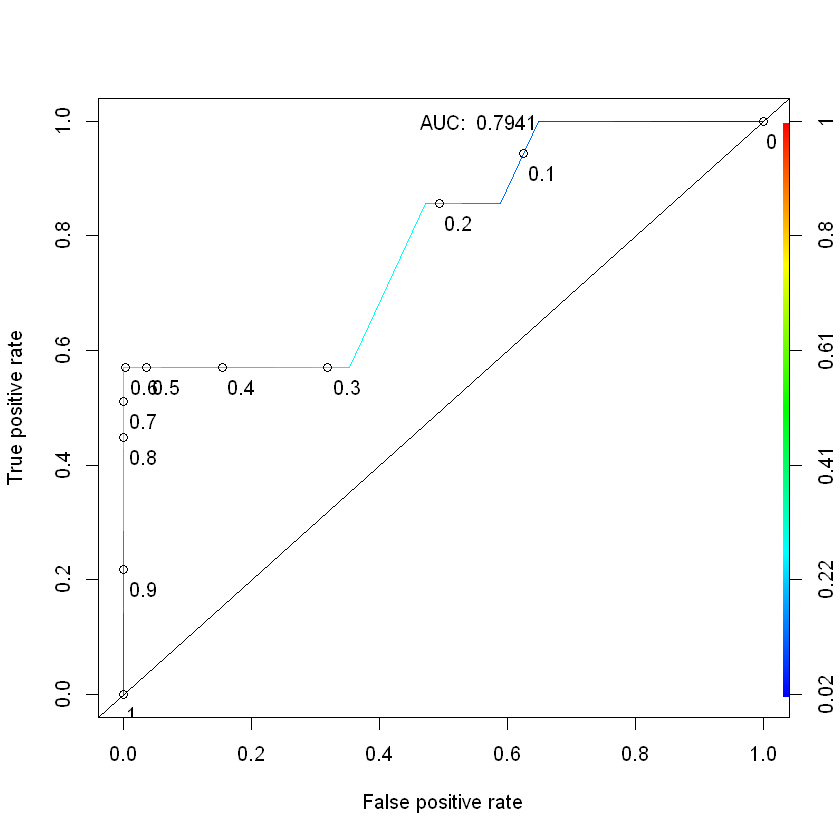

In [25]:
# Build Receiver Operator Charastics ROC
library(ROCR)

# Prediction function
ROCRpredTest = prediction(predictTrain,df$damage)

# Performance function
ROCRperfTest = performance(ROCRpredTest, "tpr", "fpr")

# Plot ROC curve and add AUC 
plot(ROCRperfTest, colorize=TRUE, print.cutoffs.at=seq(0,1,by=0.1), text.adj=c(-0.2,1.7))
abline(coef=c(0,1))
auc = as.numeric(performance(ROCRpredTest, "auc")@y.values)
text(0.5, 1, "AUC:")
text(0.6,1, round(auc,4))

### Rule of Thumb Intrepretations

If the area under ROC is:
    
    No discrimination:         0.5  
    Acceptable discrimination: 0.7 <= ROC area < 0.8 
    Excellent discrimination:  0.8 <= ROC area < 0.9 
    Outstanding discrimination ROC area >= 0.9 

##Clusters

### Standardize the variables

In [26]:
df <- transform (df,temp_scaled=scale(temp) )# standardize temp variable

In [27]:
str(df)

'data.frame':	24 obs. of  4 variables:
 $ flt        : Factor w/ 24 levels "1","2","3","4",..: 1 2 3 4 9 18 22 23 24 5 ...
 $ temp       : num  66 70 69 80 68 67 72 73 70 57 ...
 $ damage     : num  0 1 0 0 0 0 0 0 0 1 ...
 $ temp_scaled: num  -0.554 0 -0.138 1.384 -0.277 ...


In [28]:
fit02 <- kmeans(df$temp_scaled, nbrclust)

# get cluster means 
aggregate(df$temp_scaled,by=list(fit02$cluster),FUN=mean)

# append cluster assignment
mydata <- data.frame(df$temp_scaled, fit02$cluster)

,Group.1,x
1,1,0.5906933
2,2,-0.9844888


Warning message:
: package 'fpc' was built under R version 3.2.2Warning message:
In .recacheSubclasses(def@className, def, doSubclasses, env): undefined subclass "externalRefMethod" of class "kfunction"; definition not updated

ERROR: Error in mkCheckX(x, diss): x is not a data matrix


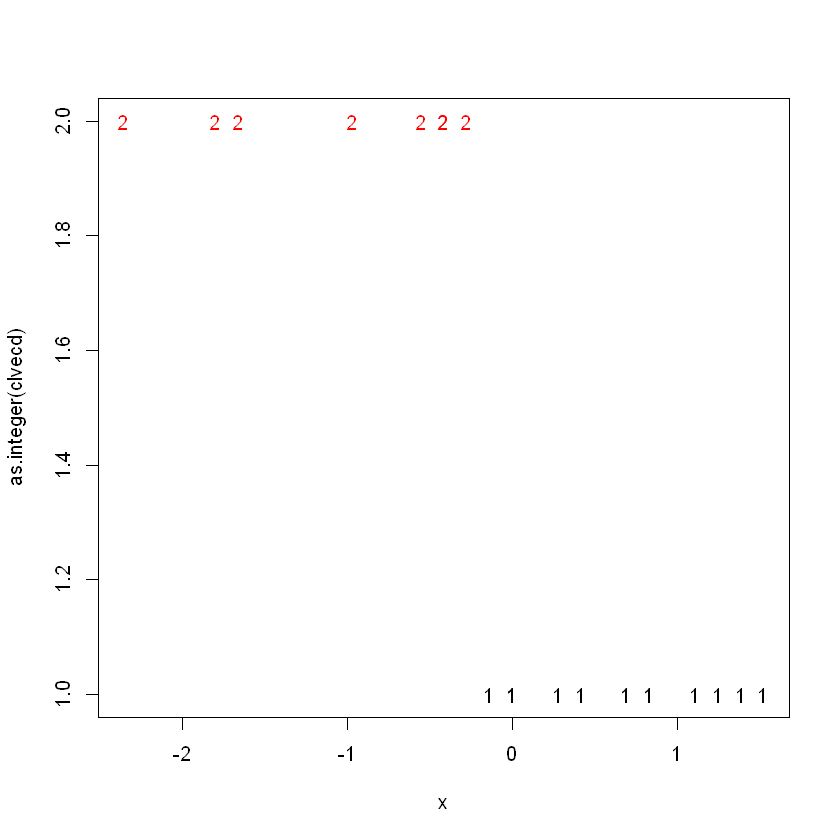

In [29]:
# Cluster Plot against 1st 2 principal components
library(fpc)
library(cluster) 

# vary parameters for most readable graph
clusplot(df$temp_scaled, fit02$cluster, color=TRUE, shade=TRUE, labels=2, lines=0)

# Centroid Plot against 1st 2 discriminant functions
plotcluster(df$temp_scaled, fit02$cluster)

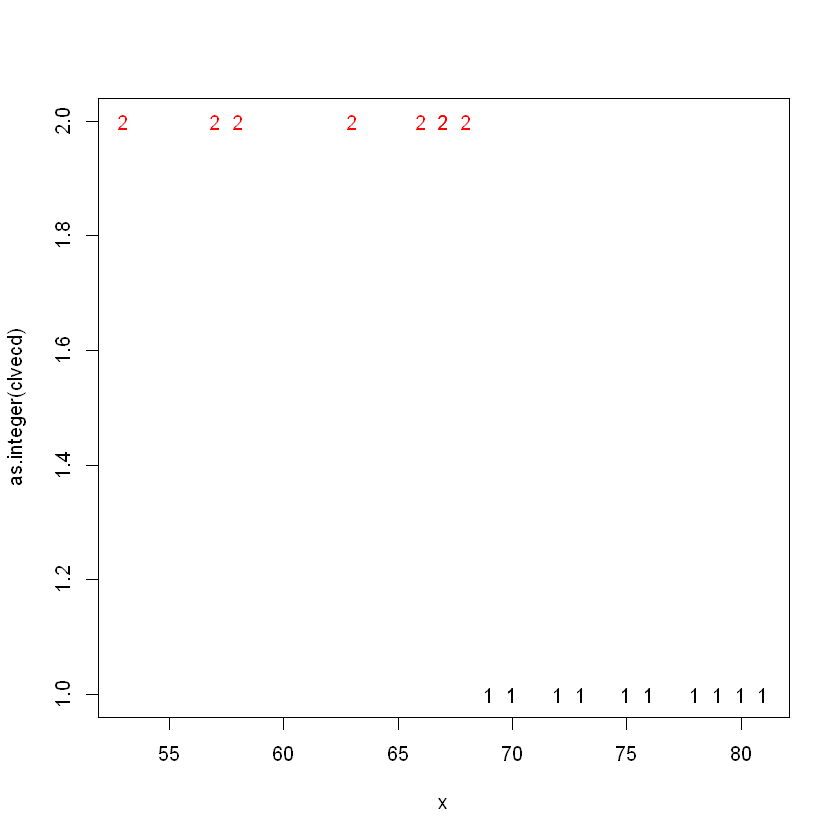

In [30]:
plotcluster(df$temp, fit02$cluster)

In [31]:
# Ward Hierarchical Clustering
d <- dist(df$temp_scaled, method = "euclidean") # distance matrix
fit03 <- hclust(d, method="ward.D2") 

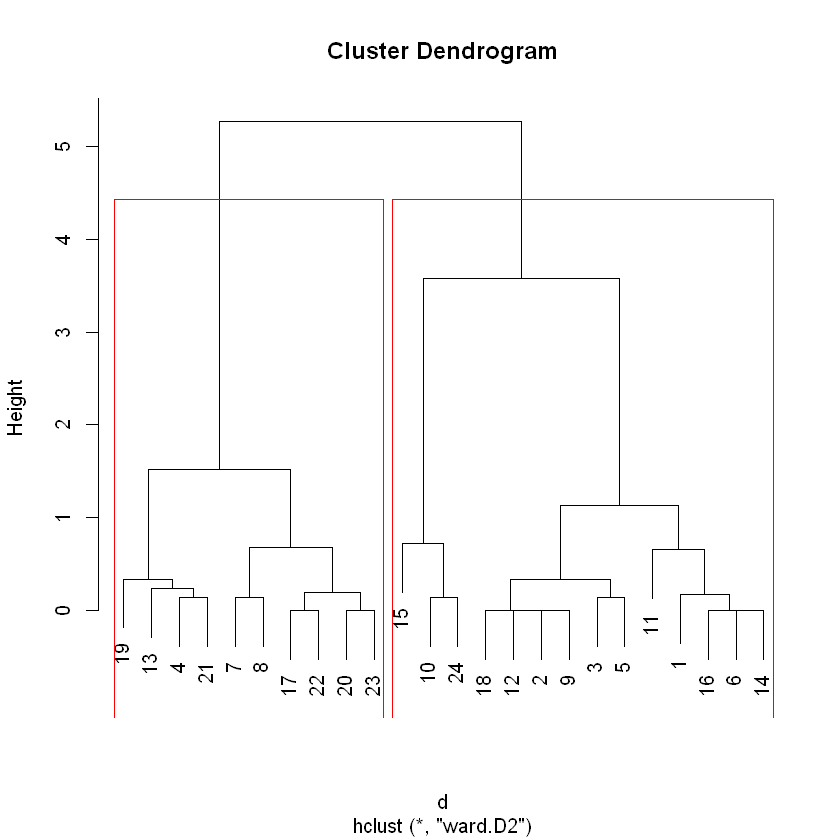

In [32]:
plot(fit03) # display dendogram
groups <- cutree(fit03, k=nbrclust) # cut tree into 5 clusters
# draw dendogram with red borders around the 5 clusters 
rect.hclust(fit03, k=nbrclust, border="red")

In [33]:
# Load groups
df$groups <- cutree(fit03, nbrclust) # cut tree 

In [34]:
aggdata= aggregate(.~ groups, data=df, FUN=mean) # Aggregation by group and computation of the mean values
proptemp=aggregate(damage~ groups, data=df, FUN=length) # Computation of the number of observations by group
aggdata$nbr=proptemp$damage
aggdata$proportion=(proptemp$damage)/sum(proptemp$damage) # Computation of the proportion by group
aggdata=aggdata[order(aggdata$proportion,decreasing=T),] # Ordering from the largest group to the smallest

In [35]:
aggdata

,groups,flt,temp,damage,temp_scaled,nbr,proportion
1,1,10.42857,65.35714,0.4285714,-0.6427745,14,0.5833333
2,2,15.4,76.5,0.1,0.8998843,10,0.4166667


In [36]:
df[order(df$group,decreasing=T),]

,flt,temp,damage,temp_scaled,groups
4,4,80,0,1.384437,2
7,7,72,0,0.2768875,2
8,8,73,0,0.4153312,2
13,41-G,78,0,1.10755,2
17,51-B,75,0,0.6922187,2
19,51-F,81,0,1.522881,2
20,51-I,76,0,0.8306624,2
21,51-J,79,0,1.245994,2
22,61-A,75,1,0.6922187,2
23,61-B,76,0,0.8306624,2


In [37]:
df[order(df$temp,decreasing=T),]

,flt,temp,damage,temp_scaled,groups
19,51-F,81,0,1.522881,2
4,4,80,0,1.384437,2
21,51-J,79,0,1.245994,2
13,41-G,78,0,1.10755,2
20,51-I,76,0,0.8306624,2
23,61-B,76,0,0.8306624,2
17,51-B,75,0,0.6922187,2
22,61-A,75,1,0.6922187,2
8,8,73,0,0.4153312,2
7,7,72,0,0.2768875,2


In [38]:
nbrclust = 3